In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df_red = pd.read_csv("wineQualityReds.csv")
df_white = pd.read_csv("wineQualityWhites.csv")

In [21]:
df_red["color"] = "R"
df_white["color"] = "W"

df_all=pd.concat([df_red,df_white],axis=0)

df_all.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [22]:
df_all.rename(columns={'fixed.acidity': 'fixed_acidity','citric.acid':'citric_acid',
                       'volatile.acidity':'volatile_acidity','residual.sugar':'residual_sugar',
                       'free.sulfur.dioxide':'free_sulfur_dioxide',
                       'total.sulfur.dioxide':'total_sulfur_dioxide'}, inplace=True)
df_all.head()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [23]:
df = pd.get_dummies(df_all, columns=["color"])
df_all.isnull().sum()

Unnamed: 0              0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.7% of the points cannot be placed; you may want to decrease the size of the marke

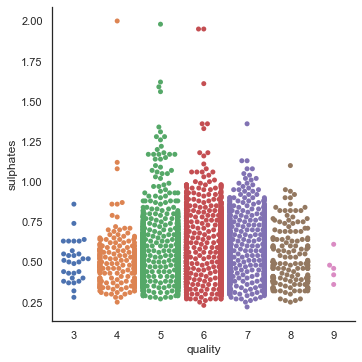

In [24]:
p = sns.catplot(x = 'quality', y = 'sulphates', kind = 'swarm', data = df_all)

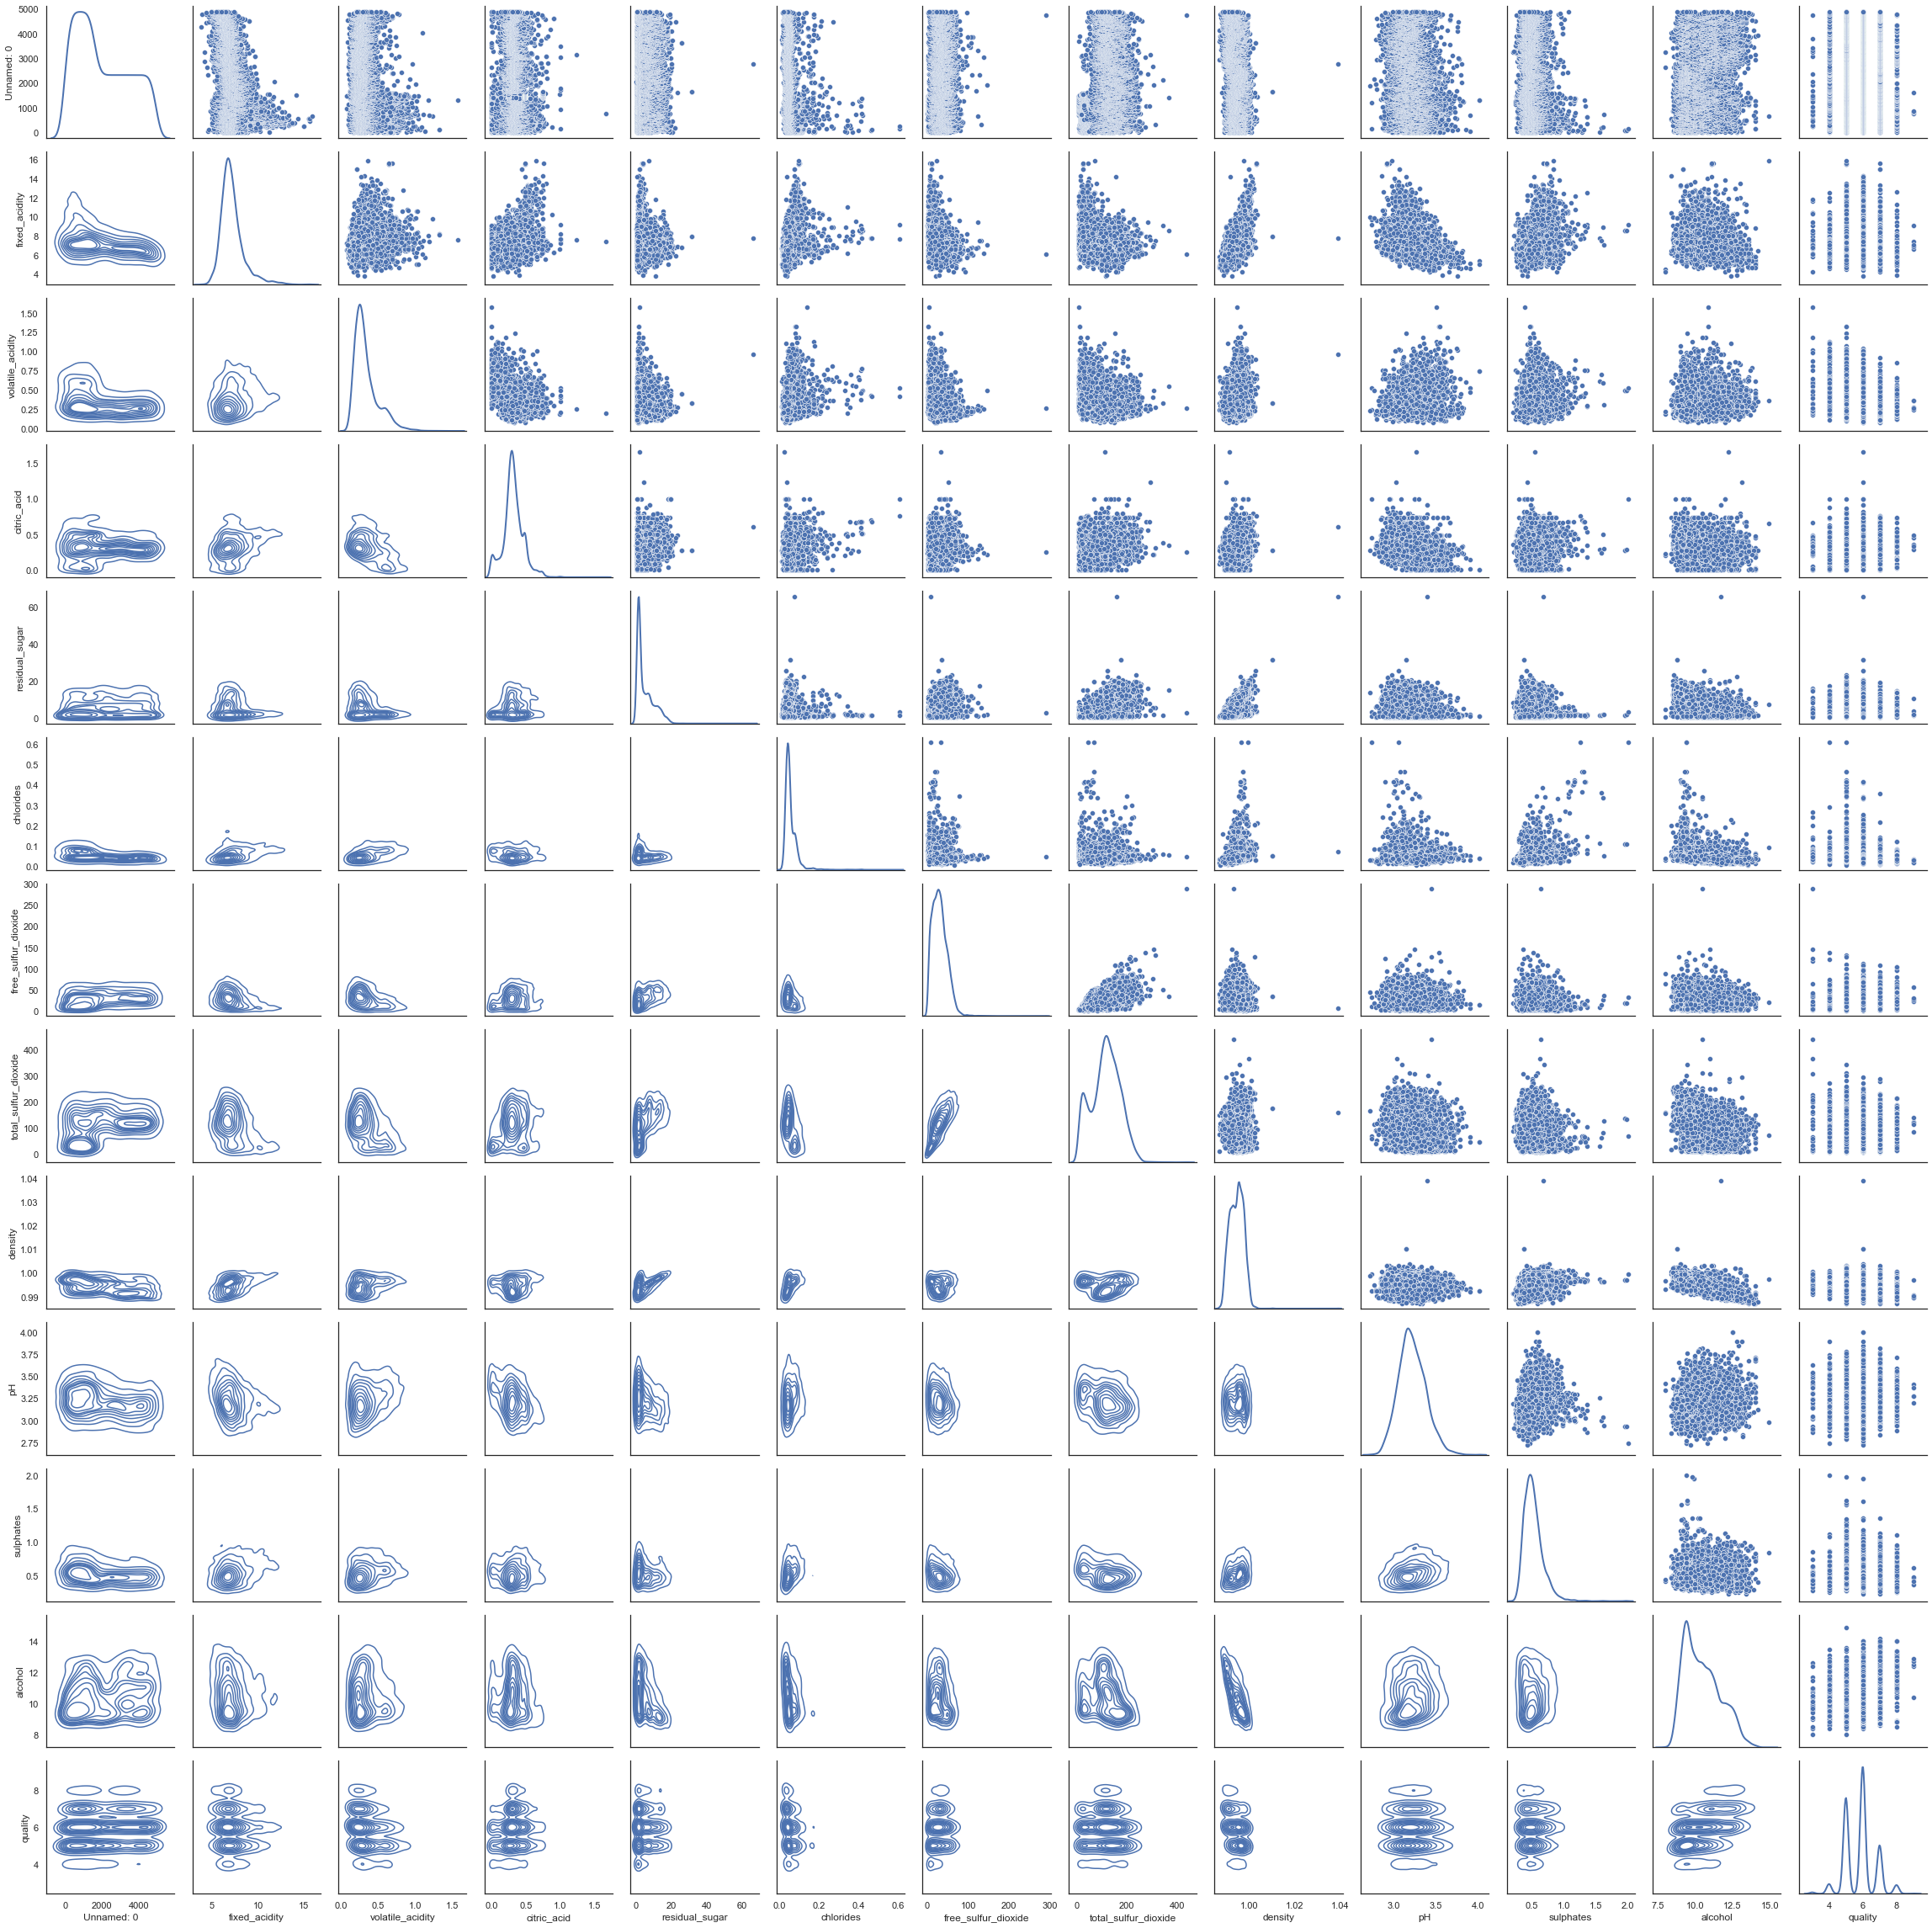

In [25]:
sns.set(style="white")
g = sns.PairGrid(data = df_all, diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors = 'C0')
g.map_diag(sns.kdeplot, lw = 2)